In [9]:
import numpy as np
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [13]:
end = dt.datetime.now()
start = dt.datetime(1995, 1, 1)
start, end

(datetime.datetime(1995, 1, 1, 0, 0),
 datetime.datetime(2023, 2, 16, 15, 41, 57, 77539))

In [6]:
stockList = ['PG']

In [14]:
df = yf.download(stockList, start , end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1995-01-03,15.46875,15.62500,15.43750,15.59375,7.771257,3318400
1995-01-04,15.53125,15.65625,15.31250,15.46875,7.708961,2218800
1995-01-05,15.37500,15.43750,15.21875,15.25000,7.599948,2319600
1995-01-06,15.15625,15.40625,15.15625,15.28125,7.615525,3438000
1995-01-09,15.34375,15.40625,15.18750,15.21875,7.584374,1795200


In [15]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-10,136.949997,138.300003,135.830002,138.259995,138.259995,8105900
2023-02-13,138.940002,140.449997,138.740005,140.070007,140.070007,5081600
2023-02-14,140.139999,140.240005,138.619995,139.279999,139.279999,5253500
2023-02-15,139.110001,139.320007,138.070007,138.960007,138.960007,5530300
2023-02-16,137.389999,138.199997,136.550003,137.139999,137.139999,6239492


In [18]:
df['simple_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
print(df['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002050
1995-01-09   -0.004090
                ...   
2023-02-10    0.008829
2023-02-13    0.013091
2023-02-14   -0.005640
2023-02-15   -0.002297
2023-02-16   -0.013097
Name: simple_return, Length: 7082, dtype: float64


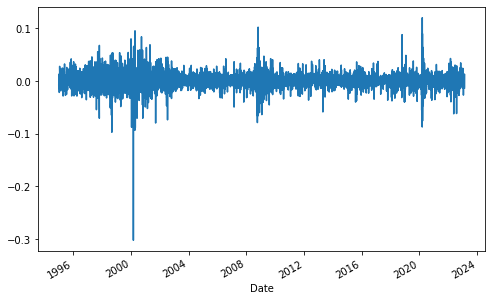

In [19]:
df['simple_return'].plot(figsize=(8,5))

In [21]:
avg_returns_daily = df['simple_return'].mean()
avg_returns_daily

0.0005052606432408512

In [22]:
avg_returns_annual = df['simple_return'].mean() * 250
avg_returns_annual

0.1263151608102128

In [31]:
print(str(round(avg_returns_annual, 3) * 100) + ' %')

12.6 %


In [32]:
df['log_return'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))
print(df['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008049
1995-01-05   -0.014242
1995-01-06    0.002048
1995-01-09   -0.004099
                ...   
2023-02-10    0.008790
2023-02-13    0.013006
2023-02-14   -0.005656
2023-02-15   -0.002300
2023-02-16   -0.013184
Name: log_return, Length: 7082, dtype: float64


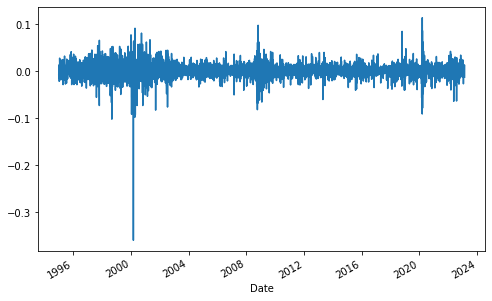

In [34]:
df['log_return'].plot(figsize=(8,5))

In [35]:
log_return_daily = df['log_return'].mean()
log_return_annual = df['log_return'].mean() * 250

log_return_daily, log_return_annual

(0.0004053905265514679, 0.10134763163786698)

In [36]:
print(str(round(log_return_annual, 4) * 100) + ' %')

10.13 %
